# Maladie de Parkinson, segmentation par probabilité de développer la maladie

In [1004]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Import du dataset 

In [1005]:
data = pd.read_csv("dataset_2.csv")

In [1006]:
data.head()

,Participant code,Age (years),Gender,Positive history of Parkinson disease in family,18. Speech,19. Facial Expression,20. Tremor at Rest - head,20. Tremor at Rest - RUE,20. Tremor at Rest - LUE,20. Tremor at Rest - RLE,20. Tremor at Rest - LLE,21. Action or Postural Tremor - RUE,21. Action or Postural Tremor - LUE,22. Rigidity - neck,22. Rigidity - RUE,22. Rigidity - LUE,22. Rigidity - RLE,22. Rigidity - LLE,23.Finger Taps - RUE,23.Finger Taps - LUE,24. Hand Movements - RUE,24. Hand Movements - LUE,25. Rapid Alternating Movements - RUE,25. Rapid Alternating Movements - LUE,26. Leg Agility - RLE,26. Leg Agility - LLE,27. Arising from Chair,28. Posture,29. Gait,30. Postural Stability,31. Body Bradykinesia and Hypokinesia
0,PD01,58,F,No,0,1,0,0,2,0,2,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,PD02,68,F,No,1,1,0,0,0,0,0,1,1,1,0,1,1,2,1,2,0,1,1,2,1,2,0,1,0,1,1
2,PD03,68,M,No,0,2,0,0,0,0,0,0,0,2,0,0,2,2,1,1,0,1,0,0,1,2,0,3,0,0,2
3,PD04,75,M,No,0,2,0,1,0,1,0,1,1,1,1,1,1,1,1,1,2,2,1,2,1,0,0,1,1,0,1
4,PD05,61,M,Yes,1,3,3,2,1,1,0,1,2,3,3,3,1,1,3,4,2,4,2,3,1,3,1,2,1,1,2


In [1007]:
data.columns

Index(['Participant  code', 'Age  (years)', 'Gender',
       'Positive  history  of  Parkinson  disease  in  family', '18.  Speech',
       '19.  Facial  Expression', '20.  Tremor  at  Rest  -  head',
       '20.  Tremor  at  Rest  -  RUE', '20.  Tremor  at  Rest  -  LUE',
       '20.  Tremor  at  Rest  -  RLE', '20.  Tremor  at  Rest  -  LLE',
       '21.  Action  or  Postural  Tremor  -  RUE',
       '21.  Action  or  Postural  Tremor  -  LUE', '22.  Rigidity  -  neck',
       '22.  Rigidity  -  RUE', '22.  Rigidity  -  LUE',
       '22.  Rigidity  -  RLE', '22.  Rigidity  -  LLE',
       '23.Finger  Taps  -  RUE', '23.Finger  Taps  -  LUE',
       '24.  Hand  Movements  -  RUE', '24.  Hand  Movements  -  LUE',
       '25.  Rapid  Alternating  Movements  -  RUE',
       '25.  Rapid  Alternating  Movements  -  LUE',
       '26.  Leg  Agility  -  RLE', '26.  Leg  Agility  -  LLE',
       '27.  Arising  from  Chair', '28.  Posture', '29.  Gait',
       '30.  Postural  Stability',
      

In [1008]:
data.dtypes

Participant  code                                        object
Age  (years)                                              int64
Gender                                                   object
Positive  history  of  Parkinson  disease  in  family    object
18.  Speech                                              object
19.  Facial  Expression                                  object
20.  Tremor  at  Rest  -  head                           object
20.  Tremor  at  Rest  -  RUE                            object
20.  Tremor  at  Rest  -  LUE                            object
20.  Tremor  at  Rest  -  RLE                            object
20.  Tremor  at  Rest  -  LLE                            object
21.  Action  or  Postural  Tremor  -  RUE                object
21.  Action  or  Postural  Tremor  -  LUE                object
22.  Rigidity  -  neck                                   object
22.  Rigidity  -  RUE                                    object
22.  Rigidity  -  LUE                   

## Data cleaning 

In [1009]:
data.columns = data.columns.str.replace('\d+', '')
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace('.','')
data.columns = data.columns.str.replace(' ','_')
data.columns = data.columns.str.replace('__','',1)
data.columns = data.columns.str.replace('_','',1)

## Data featuring 

In [1010]:
data.drop(columns=['Participantcode'], inplace=True)

In [1011]:
data.isna().sum()

Age(years)                                            0
Gender                                                0
Positivehistory_of__Parkinson__disease__in__family    0
Speech                                                0
Facial_Expression                                     0
Tremor_at__Rest__-__head                              0
Tremor_at__Rest__-__RUE                               0
Tremor_at__Rest__-__LUE                               0
Tremor_at__Rest__-__RLE                               0
Tremor_at__Rest__-__LLE                               0
Action_or__Postural__Tremor__-__RUE                   0
Action_or__Postural__Tremor__-__LUE                   0
Rigidity_-__neck                                      0
Rigidity_-__RUE                                       0
Rigidity_-__LUE                                       0
Rigidity_-__RLE                                       0
Rigidity_-__LLE                                       0
FingerTaps_-__RUE                               

In [1012]:
data['Posture'].value_counts()

-    50
0    44
1    23
2     9
3     4
Name: Posture, dtype: int64

Healthy controls patients did not attend the physical session, I replace the value '-' by 0

In [1013]:
data.replace('-',0,inplace=True)

In [1014]:
for col in  data.columns[3:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [1015]:
data.dtypes

Age(years)                                             int64
Gender                                                object
Positivehistory_of__Parkinson__disease__in__family    object
Speech                                                 int64
Facial_Expression                                      int64
Tremor_at__Rest__-__head                               int64
Tremor_at__Rest__-__RUE                                int64
Tremor_at__Rest__-__LUE                                int64
Tremor_at__Rest__-__RLE                                int64
Tremor_at__Rest__-__LLE                                int64
Action_or__Postural__Tremor__-__RUE                    int64
Action_or__Postural__Tremor__-__LUE                    int64
Rigidity_-__neck                                       int64
Rigidity_-__RUE                                        int64
Rigidity_-__LUE                                        int64
Rigidity_-__RLE                                        int64
Rigidity_-__LLE         

In [1016]:
data = data[[i for i in list(data.columns) if i != 'Age(years)']].replace(2,1)

In [1017]:
data = data[[i for i in list(data.columns) if i != 'Age(years)']].replace(3,1)

In [1018]:
cols = data.columns.values[data.dtypes == object]
data = pd.get_dummies(data, columns=cols, drop_first=True)

In [1019]:
data.dtypes

Speech                                                    int64
Facial_Expression                                         int64
Tremor_at__Rest__-__head                                  int64
Tremor_at__Rest__-__RUE                                   int64
Tremor_at__Rest__-__LUE                                   int64
Tremor_at__Rest__-__RLE                                   int64
Tremor_at__Rest__-__LLE                                   int64
Action_or__Postural__Tremor__-__RUE                       int64
Action_or__Postural__Tremor__-__LUE                       int64
Rigidity_-__neck                                          int64
Rigidity_-__RUE                                           int64
Rigidity_-__LUE                                           int64
Rigidity_-__RLE                                           int64
Rigidity_-__LLE                                           int64
FingerTaps_-__RUE                                         int64
FingerTaps_-__LUE                       

In [1020]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(data)
pca_x = pca.transform(data)
pca_df = pd.DataFrame([pca_x[:, 0], pca_x[:, 1]]).T
pca_df.columns = ['PC1', 'PC2']

## Model KMeans 

C:\Users\aline.debenath\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\aline.debenath\AppData\Local\Continuum\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


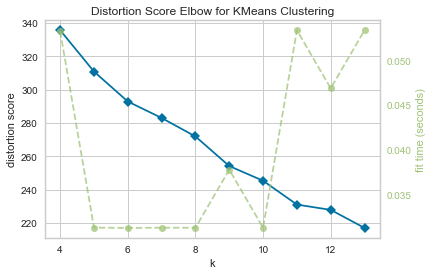

In [1021]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,14))
visualizer.fit(data)
visualizer.poof()

In [1022]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

C:\Users\aline.debenath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\aline.debenath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1023]:
kmeans = KMeans(n_clusters=5)
parkinson_clusters = kmeans.fit(data)
data['Cluster'] = parkinson_clusters.fit_predict(data)

In [1024]:
data['Cluster'].value_counts(sort=False)

0    21
1    58
2    15
3    34
4     2
Name: Cluster, dtype: int64

data characterization

In [1025]:
data[data['Cluster']==7].mean()

Speech                                                   NaN
Facial_Expression                                        NaN
Tremor_at__Rest__-__head                                 NaN
Tremor_at__Rest__-__RUE                                  NaN
Tremor_at__Rest__-__LUE                                  NaN
Tremor_at__Rest__-__RLE                                  NaN
Tremor_at__Rest__-__LLE                                  NaN
Action_or__Postural__Tremor__-__RUE                      NaN
Action_or__Postural__Tremor__-__LUE                      NaN
Rigidity_-__neck                                         NaN
Rigidity_-__RUE                                          NaN
Rigidity_-__LUE                                          NaN
Rigidity_-__RLE                                          NaN
Rigidity_-__LLE                                          NaN
FingerTaps_-__RUE                                        NaN
FingerTaps_-__LUE                                        NaN
Hand_Movements__-__RUE  

In [1026]:
data[data['Cluster']==0].mean()

Speech                                                    0.205157
Facial_Expression                                         0.511508
Tremor_at__Rest__-__head                                  0.682187
Tremor_at__Rest__-__RUE                                   1.253582
Tremor_at__Rest__-__LUE                                   0.460891
Tremor_at__Rest__-__RLE                                   0.163453
Tremor_at__Rest__-__LLE                                  -0.200000
Action_or__Postural__Tremor__-__RUE                       0.531061
Action_or__Postural__Tremor__-__LUE                       1.321200
Rigidity_-__neck                                         -0.125146
Rigidity_-__RUE                                          -0.089270
Rigidity_-__LUE                                          -0.144131
Rigidity_-__RLE                                          -0.333333
Rigidity_-__LLE                                          -0.109971
FingerTaps_-__RUE                                         0.30

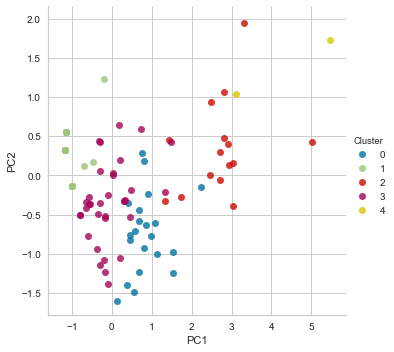

In [1027]:
pca_df = pd.concat([pca_df, data['Cluster']], axis=1)
sns.lmplot('PC1', 'PC2', data=pca_df, hue='Cluster', fit_reg=False)

In [1028]:
data.drop(columns=['Cluster'], inplace=True)

In [1029]:
from sklearn.metrics import silhouette_score
silhouette_score(data, kmeans.predict(data))

0.3062407085061802

## Model DBscan 

In [1030]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5)
dbscan.fit(data)
data['Cluster2'] = dbscan.labels_

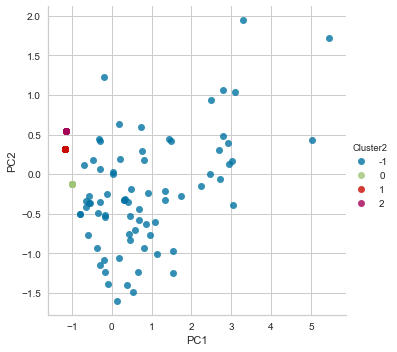

In [1031]:
pca_df = pd.concat([pca_df, data['Cluster2']], axis=1)
sns.lmplot('PC1', 'PC2', data=pca_df, hue='Cluster2', fit_reg=False)

In [1032]:
data.drop(columns=['Cluster2'], inplace=True)

In [1033]:
silhouette_score(data, dbscan.labels_, metric='euclidean')

0.289629113033563

## Model Gaussian mixture 

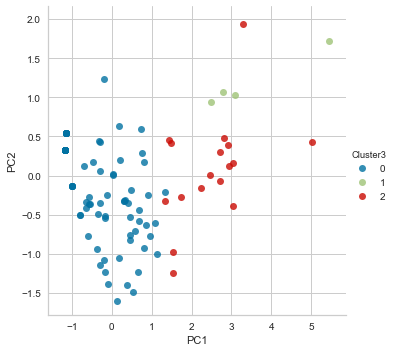

In [1034]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(data)
data['Cluster3']= gmm.predict(data)
pca_df = pd.concat([pca_df, data['Cluster3']], axis=1)
sns.lmplot('PC1', 'PC2', data=pca_df, hue='Cluster3', fit_reg=False)

In [1035]:
data.drop(columns=['Cluster3'], inplace=True)

In [1036]:
silhouette_score(data, gmm.predict(data), metric='euclidean')

0.4429296976502628

## T-SNE plots

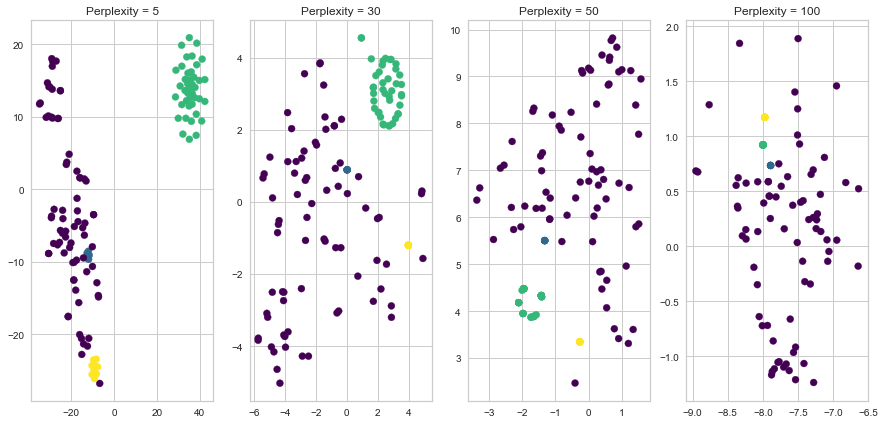

In [1037]:
from sklearn.manifold import TSNE
fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(data)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=dbscan.labels_, cmap='viridis')
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()

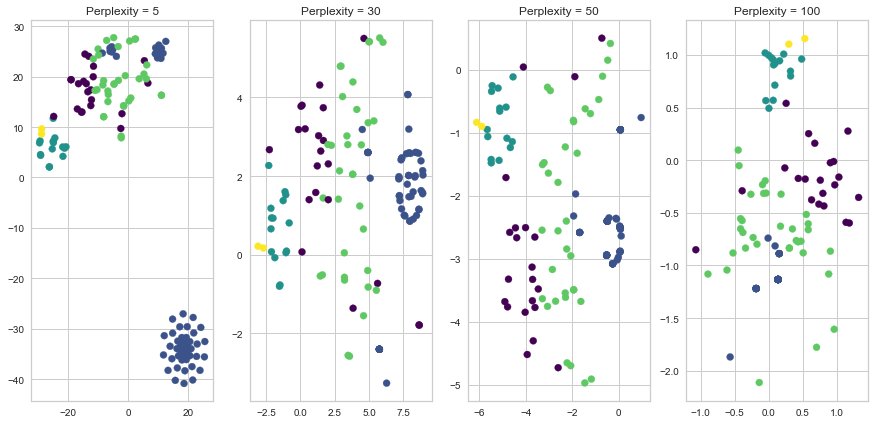

In [1038]:
from sklearn.manifold import TSNE
fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(data)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=kmeans.predict(data), cmap='viridis')
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()

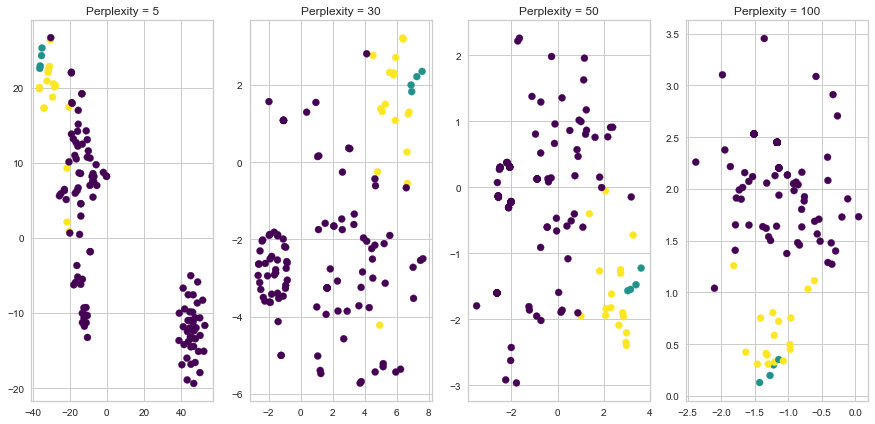

In [1039]:
from sklearn.manifold import TSNE
fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(data)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=gmm.predict(data), cmap='viridis')
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()